# Thresholding
Various types of artifacts were found on breast mammogram images, as shown below.

In [1]:
import os
import numpy as np
import cv2
from bcd.preprocess.image.threshold import ThresholdAnalyzer, ThresholdManual, ThresholdOTSU, ThresholdTriangle, ThresholdAdaptiveMean,  ThresholdAdaptiveGaussian, ThresholdISOData, ThresholdLi, ThresholdTriangleAnalyzer, ThresholdYen, ThresholdSurveyor
from bcd.utils.visual import plot_images

In [2]:
img1 = "data/image/1_dev/converted/train/benign/347c2455-cb62-40f8-a173-9e4eb9a21902.png"
img2 = "data/image/1_dev/converted/train/benign/4ed91643-1e06-4b2c-8efb-bc60dd9e0313.png"
img3 = "data/image/1_dev/converted/train/malignant/7dcc12fd-88f0-4048-a6ab-5dd0bd836f08.png"
img4 = "data/image/1_dev/converted/train/malignant/596ef5db-9610-4f13-9c1a-4c411b1d957c.png"


In [3]:
img1 = cv2.imread(img1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2, cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread(img3, cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread(img4, cv2.IMREAD_GRAYSCALE)

In [4]:
images = (img1,img2,img3,img4)

## Threshold Values

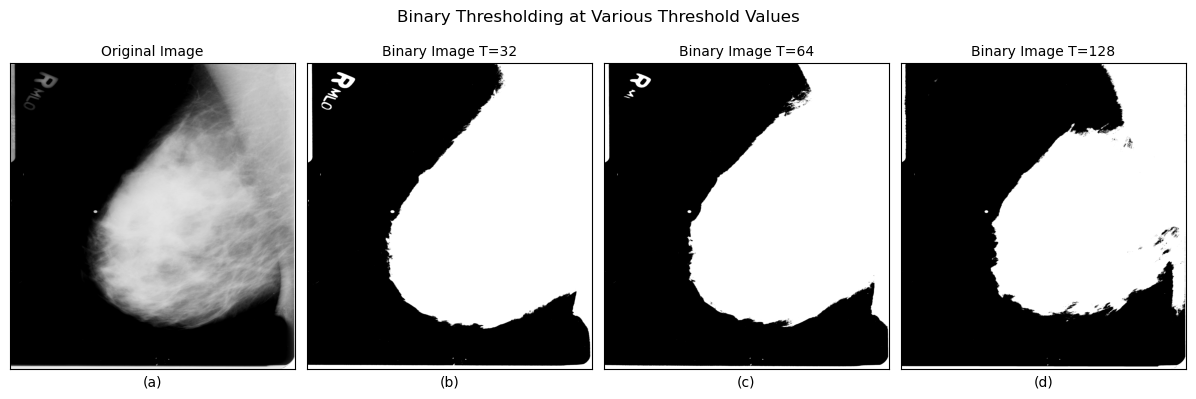

In [5]:
def plot_binary_images(image: np.ndarray, thresholds: list):
    thresholds = [32,64,128]
    images = [img3]
    for t in thresholds:
        _, img = cv2.threshold(img3, thresh=t, maxval=np.max(img3), type=cv2.THRESH_BINARY)
        images.append(img)
    titles = [f"Binary Image T={t}" for t in thresholds]
    titles = ["Original Image"] + titles    
    title = "Binary Thresholding at Various Threshold Values"
    return plot_images(images=images, titles=titles, title=title)

thresholds = [32,64,128]
fig = plot_binary_images(image=img3, thresholds=thresholds)    

## Manual Thresholding

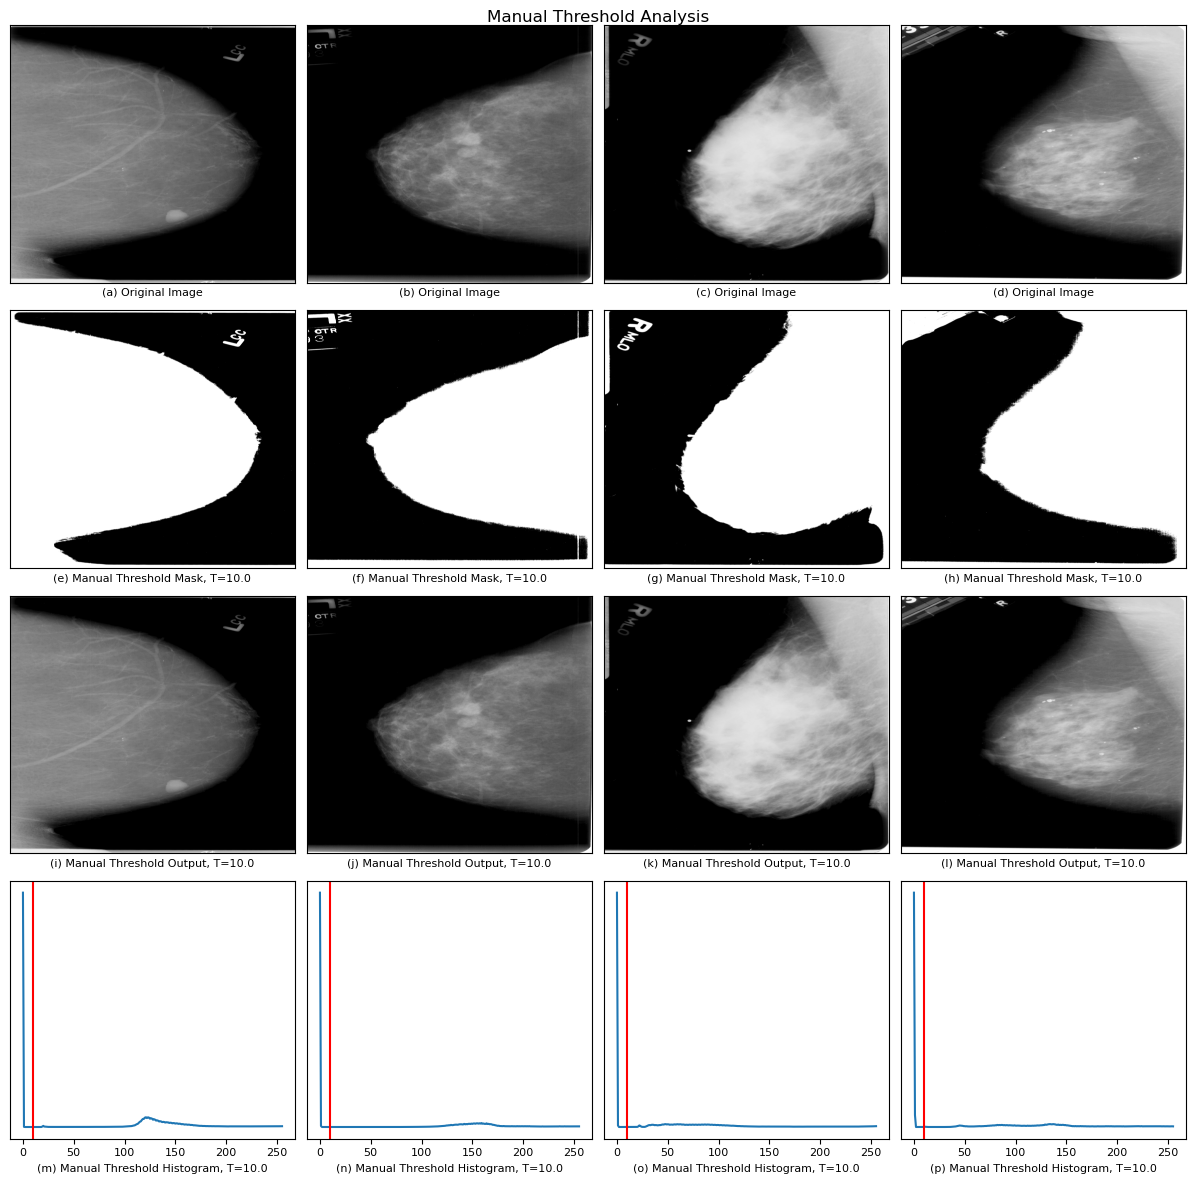

In [6]:
analyzer = ThresholdAnalyzer()
threshold = ThresholdManual(threshold=10)
_ = analyzer.analyze(images, threshold)

## ISOData Thresholding

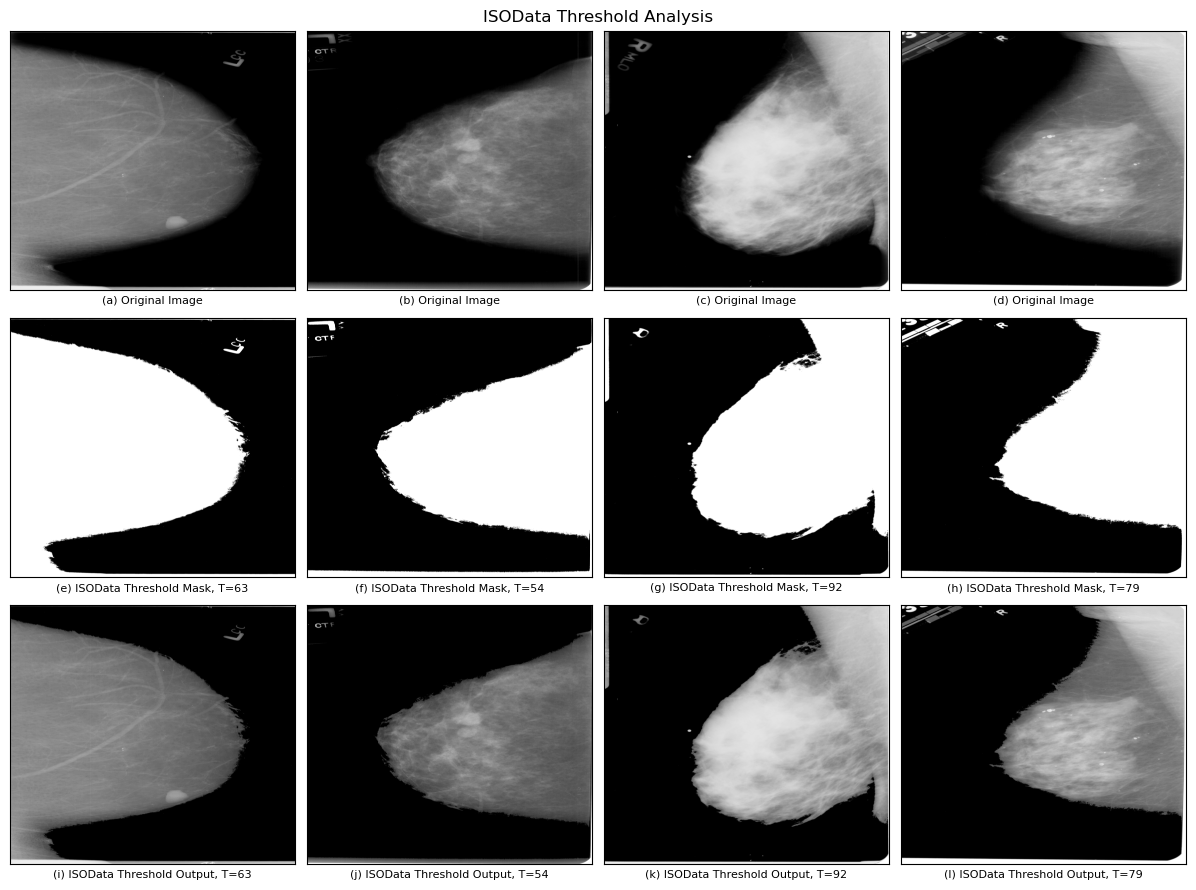

In [7]:
analyzer = ThresholdAnalyzer(show_histograms=False)
threshold = ThresholdISOData()
_ = analyzer.analyze(images, threshold)

## Minimum Entropy Thresholding

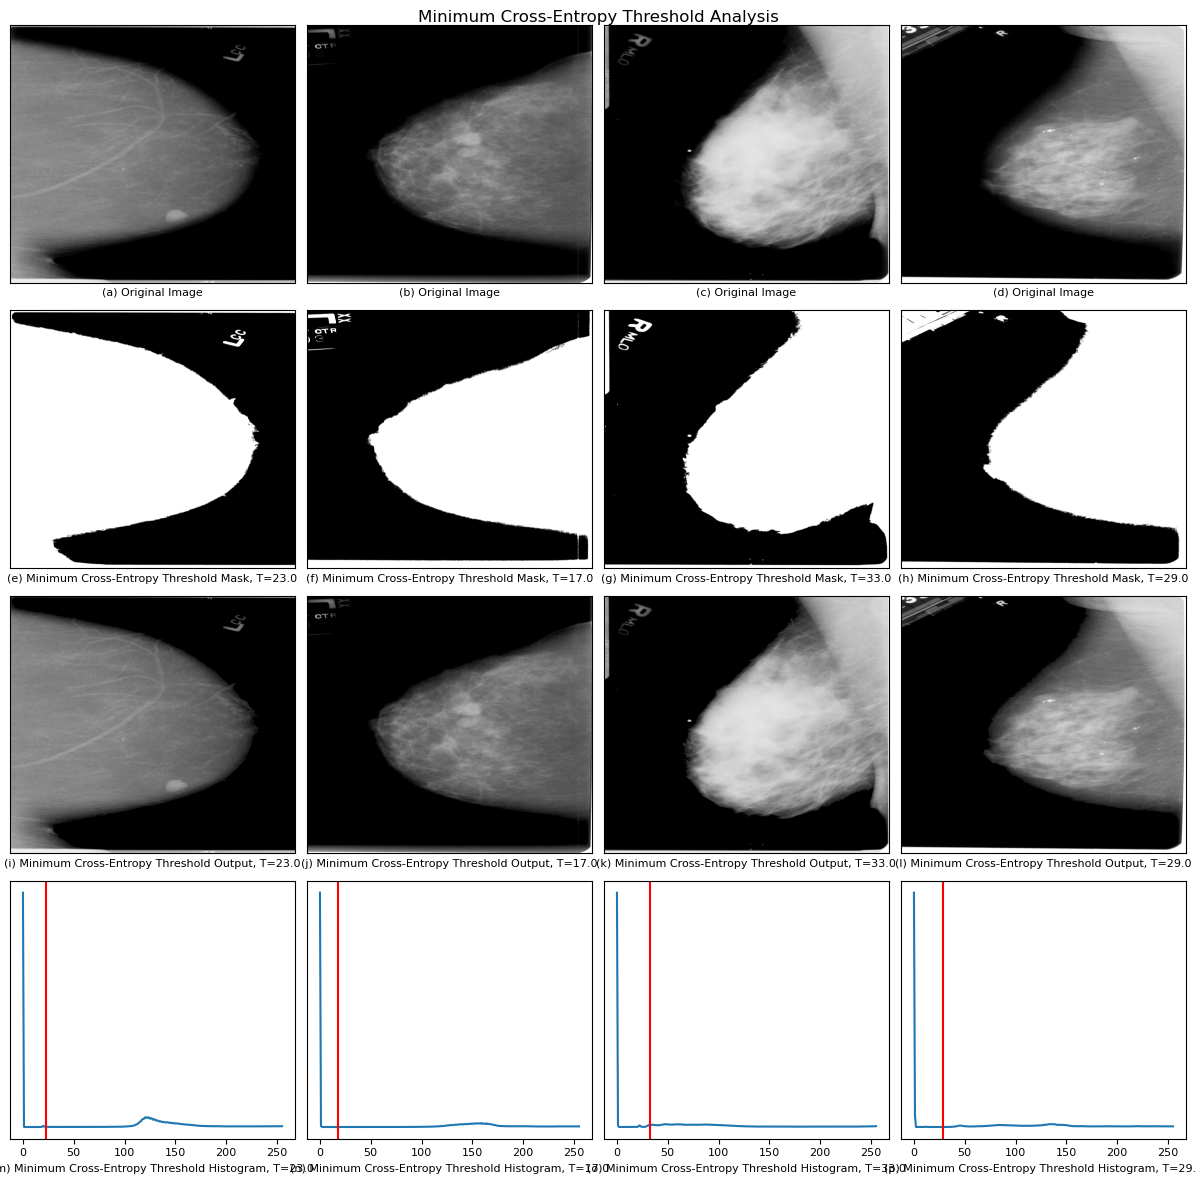

In [8]:
analyzer = ThresholdAnalyzer()
threshold = ThresholdLi()
_ = analyzer.analyze(images, threshold)

## OTSU's Method

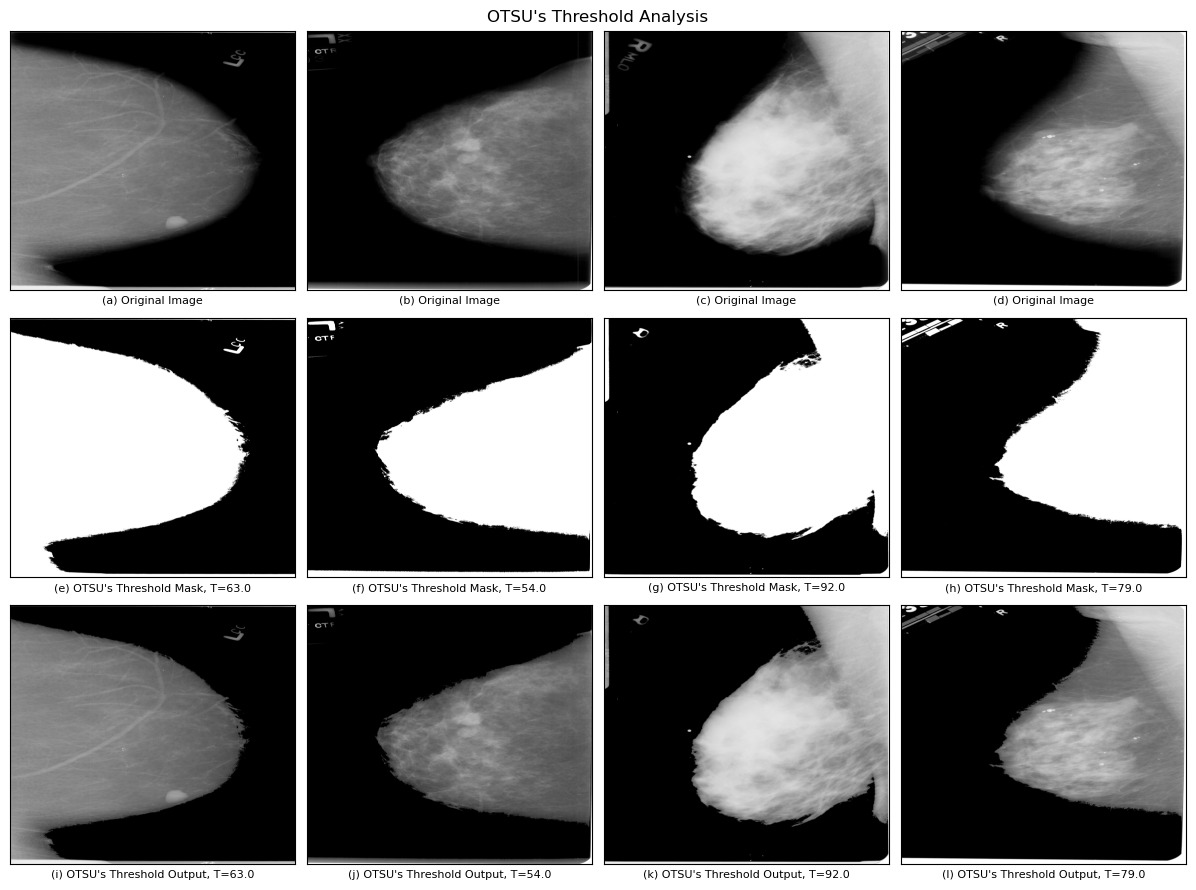

In [9]:
analyzer = ThresholdAnalyzer(show_histograms=False)
threshold = ThresholdOTSU()
_ = analyzer.analyze(images, threshold)

## Triangle Method

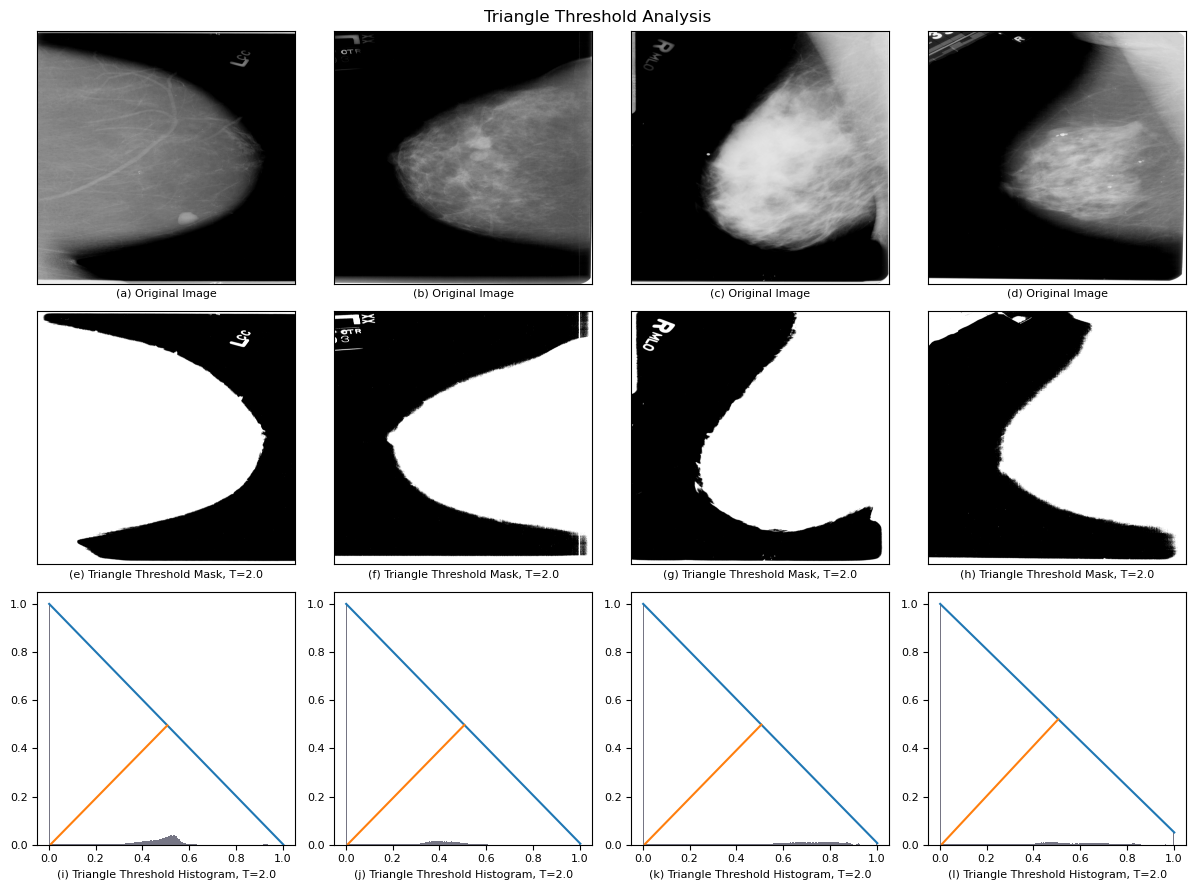

In [10]:
analyzer = ThresholdTriangleAnalyzer(show_masked_images=False)
threshold = ThresholdTriangle()
_ = analyzer.analyze(images, threshold)

## Adaptive Mean Thresholding

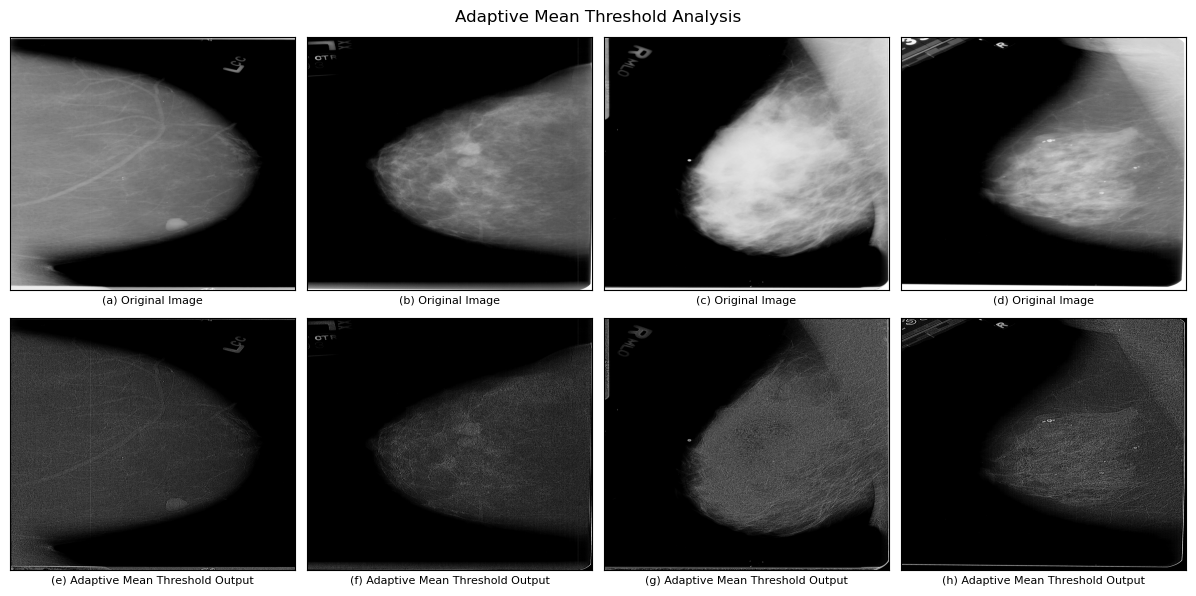

In [11]:
analyzer = ThresholdAnalyzer(show_masks=False)
threshold = ThresholdAdaptiveMean()
_ = analyzer.analyze(images, threshold)

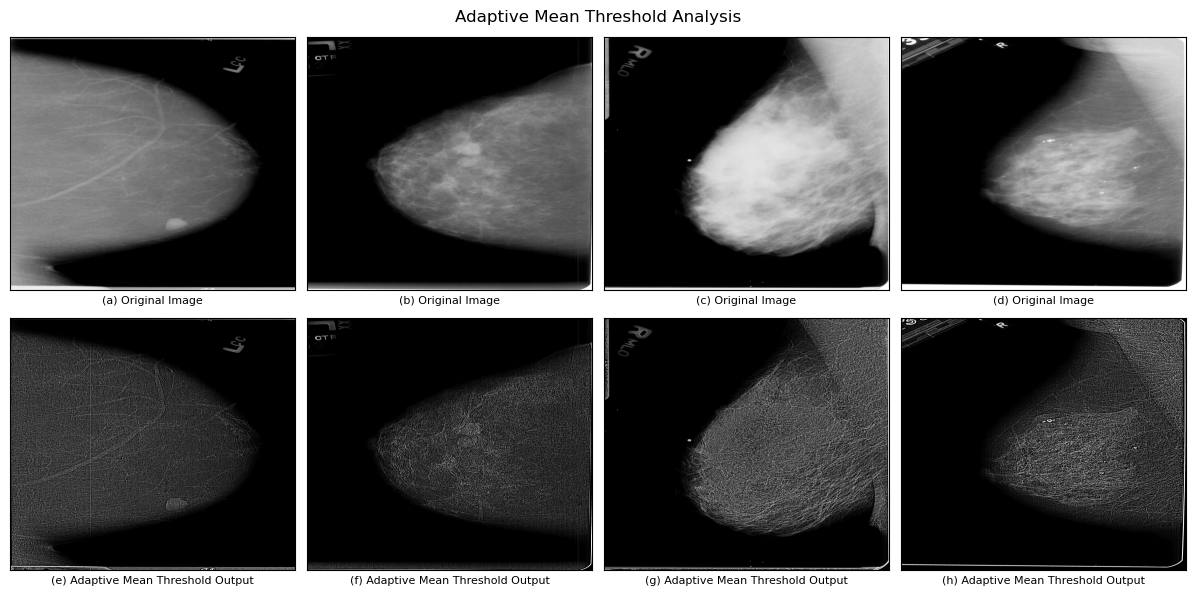

In [12]:
analyzer = ThresholdAnalyzer(show_masks=False)
threshold = ThresholdAdaptiveMean(blocksize=21)
_ = analyzer.analyze(images, threshold)

## Adaptive Gaussian Thresholding

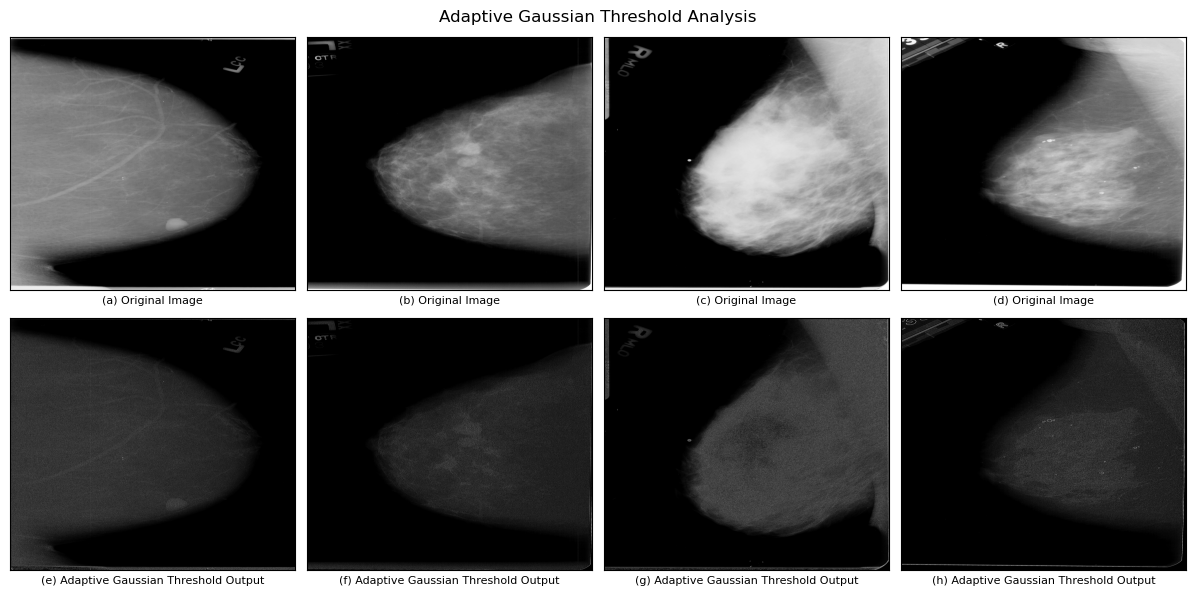

In [13]:
analyzer = ThresholdAnalyzer(show_masks=False)
threshold = ThresholdAdaptiveGaussian(blocksize=5)
_ = analyzer.analyze(images, threshold)

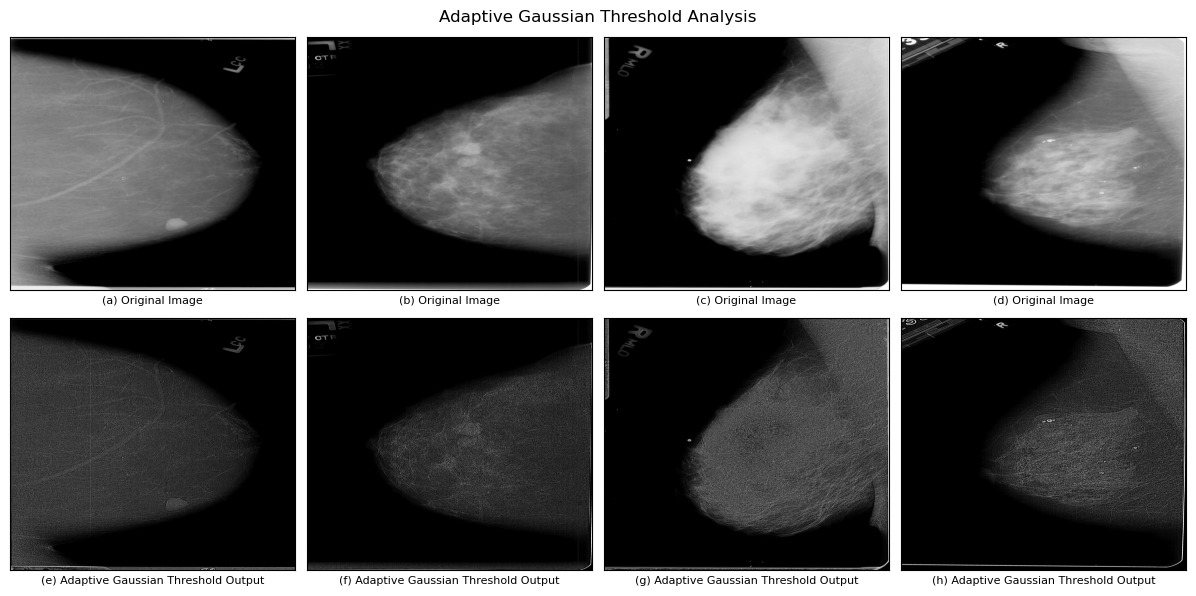

In [14]:
analyzer = ThresholdAnalyzer(show_masks=False)
threshold = ThresholdAdaptiveGaussian(blocksize=21)
_ = analyzer.analyze(images, threshold)

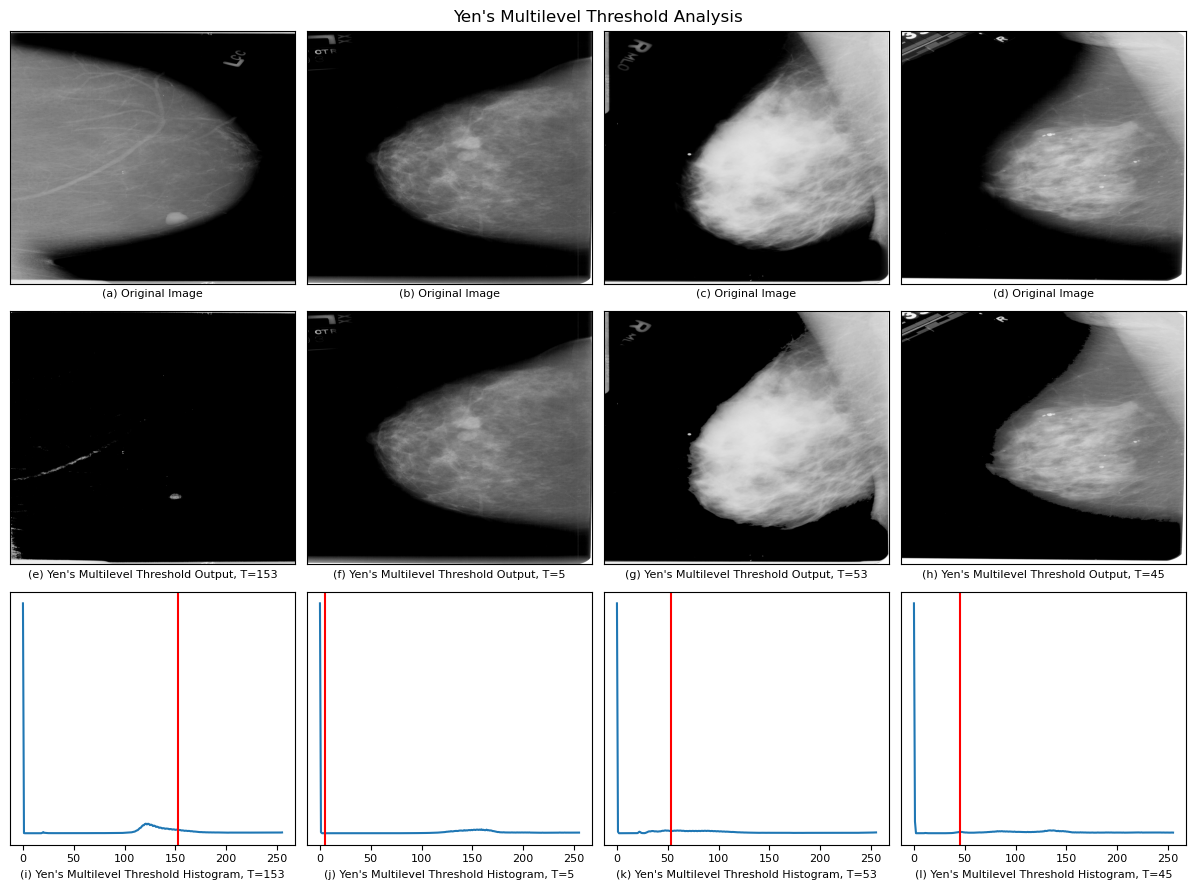

In [15]:
analyzer = ThresholdAnalyzer(show_masks=False)
threshold = ThresholdYen()
_ = analyzer.analyze(images, threshold)

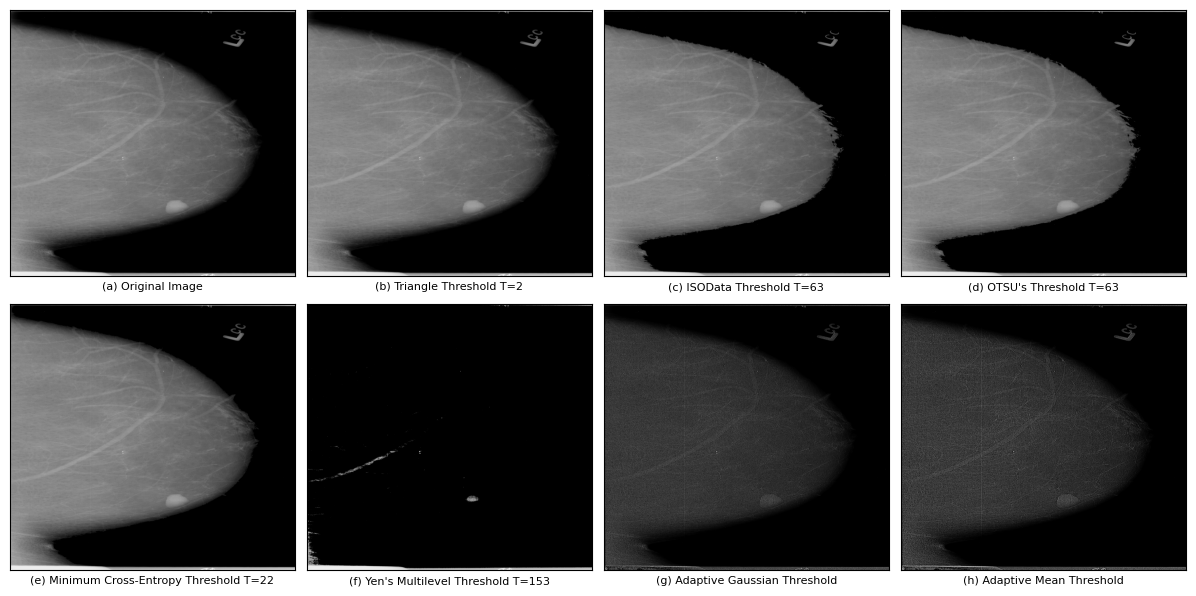

In [16]:
surveyor = ThresholdSurveyor()
_ = surveyor.tryall(image=img1)